## Import Libraries and Data

In [28]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_0410-09-2023.csv', firstRow=816, lastRow=822)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_050923_S817-822.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [29]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=58s and ended at t=472s; mass=43.77374999999999g
This equals a volume of 43.861m; expected was 44.412mL; error is 1.24%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


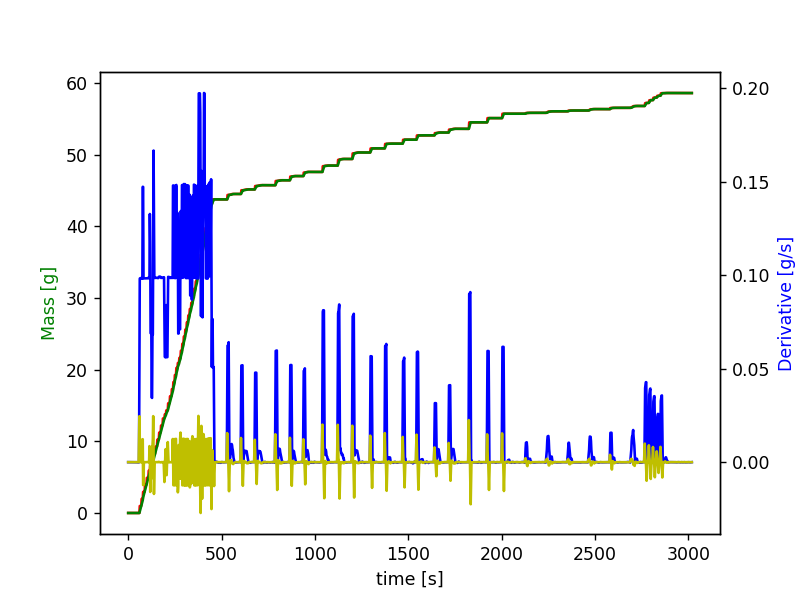

Addition of 0.761g Texapon SB 3 KC detected from 526s to 572s - expected volume = 0.99mL and actual volume = 0.688mL (resulting error is 30.466%)
Addition of 0.636g Texapon SB 3 KC detected from 600s to 648s - expected volume = 0.998mL and actual volume = 0.567mL (resulting error is 43.214%)
Addition of 0.595g Plantapon LC 7 detected from 674s to 722s - expected volume = 0.501mL and actual volume = 0.563mL (resulting error is 12.514%)
Addition of 0.692g Plantapon LC 7 detected from 784s to 828s - expected volume = 0.501mL and actual volume = 0.655mL (resulting error is 30.813%)
Addition of 0.591g Plantapon LC 7 detected from 862s to 902s - expected volume = 0.56mL and actual volume = 0.559mL (resulting error is 0.101%)
Addition of 0.58g Plantapon LC 7 detected from 934s to 972s - expected volume = 0.56mL and actual volume = 0.549mL (resulting error is 1.927%)
Addition of 0.892g Plantacare 2000 detected from 1036s to 1078s - expected volume = 0.975mL and actual volume = 0.825mL (resulti

In [30]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


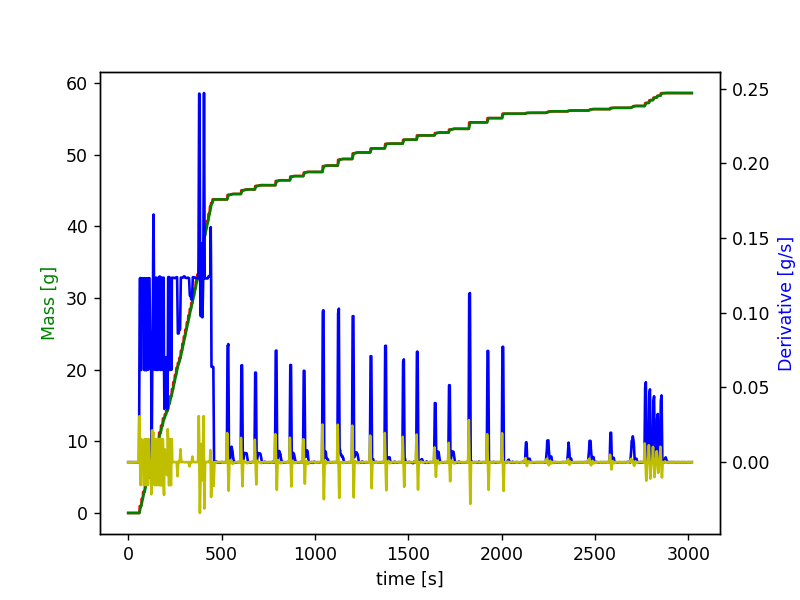

Addition of 0.121g Dehyquart CC7 Benz detected from 2122s to 2158s - expected volume = 0.129mL and actual volume = 0.12mL (resulting error is 7.212%)
Addition of 0.213g Dehyquart CC7 Benz detected from 2234s to 2274s - expected volume = 0.212mL and actual volume = 0.209mL (resulting error is 1.389%)
Addition of 0.121g Dehyquart CC7 Benz detected from 2348s to 2380s - expected volume = 0.121mL and actual volume = 0.12mL (resulting error is 0.717%)
Addition of 0.205g Dehyquart CC7 Benz detected from 2460s to 2500s - expected volume = 0.2mL and actual volume = 0.203mL (resulting error is 1.485%)
Addition of 0.18g Dehyquart CC7 Benz detected from 2576s to 2608s - expected volume = 0.172mL and actual volume = 0.178mL (resulting error is 3.448%)
Addition of 0.266g Dehyquart CC7 Benz detected from 2686s to 2730s - expected volume = 0.264mL and actual volume = 0.263mL (resulting error is 0.328%)


In [31]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2152,2256,2366,2482,2582,2680,2758])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


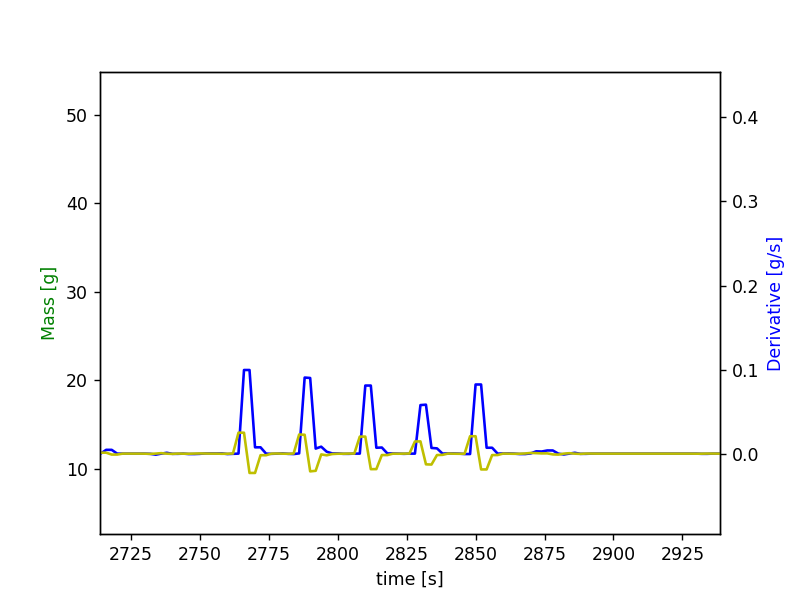

Addition of 0.426g Arlypon TT detected from 2762s to 2778s - expected volume = 0.523mL and actual volume = 0.448mL (resulting error is 14.286%)
Addition of 0.394g Arlypon TT detected from 2784s to 2800s - expected volume = 0.38mL and actual volume = 0.408mL (resulting error is 7.357%)
Addition of 0.353g Arlypon TT detected from 2806s to 2822s - expected volume = 0.357mL and actual volume = 0.368mL (resulting error is 3.216%)
Addition of 0.258g Arlypon TT detected from 2826s to 2842s - expected volume = 0.242mL and actual volume = 0.27mL (resulting error is 11.422%)
Addition of 0.356g Arlypon TT detected from 2846s to 2862s - expected volume = 0.375mL and actual volume = 0.372mL (resulting error is 0.559%)


StopIteration: 

In [32]:
# default bl_mult = 1, default mergeSens = 1
#t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2760,2780,2800,2538,2554,2568,2588])

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_050923_S811-S816.csv', index=False)
actualMassFractions